<a href="https://colab.research.google.com/github/Ranjani94/Machine_Learning/blob/master/TopicModelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Topic Naming using TF-IDF

###Importing all necessary libraries

In [0]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 

In [138]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [0]:
StopWordsSet = set(stopwords.words('english'))

In [140]:
StopWordsSet

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [141]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/MLSpring2020/the_expendables_AirQuality_Traffic/"
base_dir = root_dir + 'LDAData'

Mounted at /content/gdrive


In [0]:
filename = base_dir + '/Merge.txt'

In [143]:
file = open(filename, 'rt')
text = file.read()
file.close()
# split into sentences
from nltk import sent_tokenize
sentences = sent_tokenize(text)
print(sentences[0])

Mr. Speaker, Mr. Vice President, Members of Congress, my fellow
Americans:

Today in America, a teacher spent extra time with a student who needed
it, and did her part to lift America's graduation rate to its highest
level in more than three decades.


In [144]:
# split into words
from nltk.tokenize import word_tokenize
tokens = word_tokenize(text)
print(tokens[:100])

['Mr.', 'Speaker', ',', 'Mr.', 'Vice', 'President', ',', 'Members', 'of', 'Congress', ',', 'my', 'fellow', 'Americans', ':', 'Today', 'in', 'America', ',', 'a', 'teacher', 'spent', 'extra', 'time', 'with', 'a', 'student', 'who', 'needed', 'it', ',', 'and', 'did', 'her', 'part', 'to', 'lift', 'America', "'s", 'graduation', 'rate', 'to', 'its', 'highest', 'level', 'in', 'more', 'than', 'three', 'decades', '.', 'An', 'entrepreneur', 'flipped', 'on', 'the', 'lights', 'in', 'her', 'tech', 'startup', ',', 'and', 'did', 'her', 'part', 'to', 'add', 'to', 'the', 'more', 'than', 'eight', 'million', 'new', 'jobs', 'our', 'businesses', 'have', 'created', 'over', 'the', 'past', 'four', 'years', '.', 'An', 'autoworker', 'fine-tuned', 'some', 'of', 'the', 'best', ',', 'most', 'fuel-efficient', 'cars', 'in', 'the', 'world']


In [145]:
# convert to lower case
tokens = [w.lower() for w in tokens]
print(tokens[:100])

['mr.', 'speaker', ',', 'mr.', 'vice', 'president', ',', 'members', 'of', 'congress', ',', 'my', 'fellow', 'americans', ':', 'today', 'in', 'america', ',', 'a', 'teacher', 'spent', 'extra', 'time', 'with', 'a', 'student', 'who', 'needed', 'it', ',', 'and', 'did', 'her', 'part', 'to', 'lift', 'america', "'s", 'graduation', 'rate', 'to', 'its', 'highest', 'level', 'in', 'more', 'than', 'three', 'decades', '.', 'an', 'entrepreneur', 'flipped', 'on', 'the', 'lights', 'in', 'her', 'tech', 'startup', ',', 'and', 'did', 'her', 'part', 'to', 'add', 'to', 'the', 'more', 'than', 'eight', 'million', 'new', 'jobs', 'our', 'businesses', 'have', 'created', 'over', 'the', 'past', 'four', 'years', '.', 'an', 'autoworker', 'fine-tuned', 'some', 'of', 'the', 'best', ',', 'most', 'fuel-efficient', 'cars', 'in', 'the', 'world']


In [146]:
# remove all Punctuation
words = [word for word in tokens if word.isalpha()]
print(words[:100])

['speaker', 'vice', 'president', 'members', 'of', 'congress', 'my', 'fellow', 'americans', 'today', 'in', 'america', 'a', 'teacher', 'spent', 'extra', 'time', 'with', 'a', 'student', 'who', 'needed', 'it', 'and', 'did', 'her', 'part', 'to', 'lift', 'america', 'graduation', 'rate', 'to', 'its', 'highest', 'level', 'in', 'more', 'than', 'three', 'decades', 'an', 'entrepreneur', 'flipped', 'on', 'the', 'lights', 'in', 'her', 'tech', 'startup', 'and', 'did', 'her', 'part', 'to', 'add', 'to', 'the', 'more', 'than', 'eight', 'million', 'new', 'jobs', 'our', 'businesses', 'have', 'created', 'over', 'the', 'past', 'four', 'years', 'an', 'autoworker', 'some', 'of', 'the', 'best', 'most', 'cars', 'in', 'the', 'world', 'and', 'did', 'his', 'part', 'to', 'help', 'america', 'wean', 'itself', 'off', 'foreign', 'oil', 'a', 'farmer', 'prepared']


In [147]:
# filter out stop words
words = [w for w in words if not w in StopWordsSet]
print(words[:100])

['speaker', 'vice', 'president', 'members', 'congress', 'fellow', 'americans', 'today', 'america', 'teacher', 'spent', 'extra', 'time', 'student', 'needed', 'part', 'lift', 'america', 'graduation', 'rate', 'highest', 'level', 'three', 'decades', 'entrepreneur', 'flipped', 'lights', 'tech', 'startup', 'part', 'add', 'eight', 'million', 'new', 'jobs', 'businesses', 'created', 'past', 'four', 'years', 'autoworker', 'best', 'cars', 'world', 'part', 'help', 'america', 'wean', 'foreign', 'oil', 'farmer', 'prepared', 'spring', 'strongest', 'stretch', 'farm', 'exports', 'history', 'rural', 'doctor', 'gave', 'young', 'child', 'first', 'prescription', 'treat', 'asthma', 'mother', 'could', 'afford', 'man', 'took', 'bus', 'home', 'graveyard', 'shift', 'dreaming', 'big', 'dreams', 'son', 'communities', 'across', 'america', 'fathers', 'mothers', 'tuck', 'kids', 'put', 'arm', 'around', 'spouse', 'remember', 'fallen', 'comrades', 'give', 'thanks', 'home', 'war', 'twelve', 'long']


In [148]:
# stemming of words
from nltk.stem.porter import PorterStemmer
porter = PorterStemmer()
stemmed = [porter.stem(word) for word in words]
print(stemmed[:100])

['speaker', 'vice', 'presid', 'member', 'congress', 'fellow', 'american', 'today', 'america', 'teacher', 'spent', 'extra', 'time', 'student', 'need', 'part', 'lift', 'america', 'graduat', 'rate', 'highest', 'level', 'three', 'decad', 'entrepreneur', 'flip', 'light', 'tech', 'startup', 'part', 'add', 'eight', 'million', 'new', 'job', 'busi', 'creat', 'past', 'four', 'year', 'autowork', 'best', 'car', 'world', 'part', 'help', 'america', 'wean', 'foreign', 'oil', 'farmer', 'prepar', 'spring', 'strongest', 'stretch', 'farm', 'export', 'histori', 'rural', 'doctor', 'gave', 'young', 'child', 'first', 'prescript', 'treat', 'asthma', 'mother', 'could', 'afford', 'man', 'took', 'bu', 'home', 'graveyard', 'shift', 'dream', 'big', 'dream', 'son', 'commun', 'across', 'america', 'father', 'mother', 'tuck', 'kid', 'put', 'arm', 'around', 'spous', 'rememb', 'fallen', 'comrad', 'give', 'thank', 'home', 'war', 'twelv', 'long']


In [0]:
import gensim

In [0]:
%matplotlib inline
from matplotlib import pyplot as plt
from wordcloud import WordCloud

def display_topic(words_probabilities):
  bows = []
  [bows.extend([word] * (int(probability*100) + 1)) for word,probability in words_probabilities]
  wordcloud = WordCloud(width = 800, height = 800, background_color ='white', min_font_size = 10).generate(' '.join(bows))
  plt.figure(figsize=[3,3])
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")

In [0]:
vocab = gensim.corpora.Dictionary([stemmed])

In [0]:
bow_corpus = [vocab.doc2bow(doc) for doc in [stemmed]]
n_topics = 7

In [0]:
#Building the LDA model
lda_model = gensim.models.LdaMulticore(corpus= bow_corpus, num_topics = n_topics, id2word = vocab, passes = 10, workers = 2)

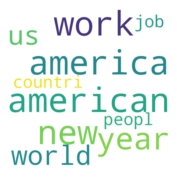

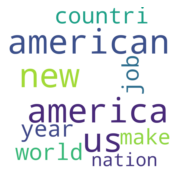

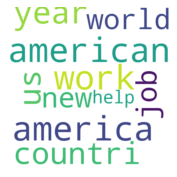

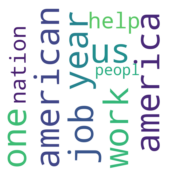

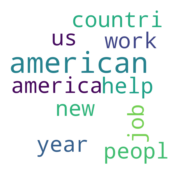

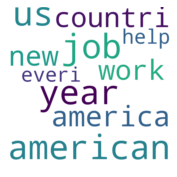

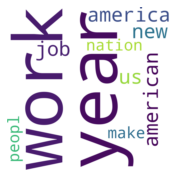

In [154]:
for topic_no in range(n_topics):
  display_topic(lda_model.show_topic(topic_no))

In [0]:
mat = []
for topic_no in range(n_topics):
  words_probabilities= lda_model.show_topic(topic_no)
  ls = []
  for word , probability in words_probabilities:
    ls.append(word)
  mat.append(ls)

In [0]:
ls = mat[0]

In [157]:
mat

[['american',
  'america',
  'work',
  'new',
  'year',
  'world',
  'us',
  'peopl',
  'job',
  'countri'],
 ['american',
  'us',
  'america',
  'new',
  'countri',
  'job',
  'year',
  'world',
  'make',
  'nation'],
 ['american',
  'work',
  'america',
  'year',
  'countri',
  'us',
  'world',
  'job',
  'new',
  'help'],
 ['american',
  'work',
  'america',
  'year',
  'job',
  'us',
  'one',
  'help',
  'nation',
  'peopl'],
 ['american',
  'america',
  'year',
  'work',
  'us',
  'job',
  'new',
  'countri',
  'peopl',
  'help'],
 ['american',
  'year',
  'us',
  'job',
  'america',
  'countri',
  'work',
  'new',
  'everi',
  'help'],
 ['year',
  'work',
  'america',
  'american',
  'job',
  'us',
  'new',
  'nation',
  'make',
  'peopl']]

In [158]:
# Visualize the topics
import pyLDAvis
import pyLDAvis.gensim as gensimvis
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, bow_corpus, vocab)
pyLDAvis.display(vis)

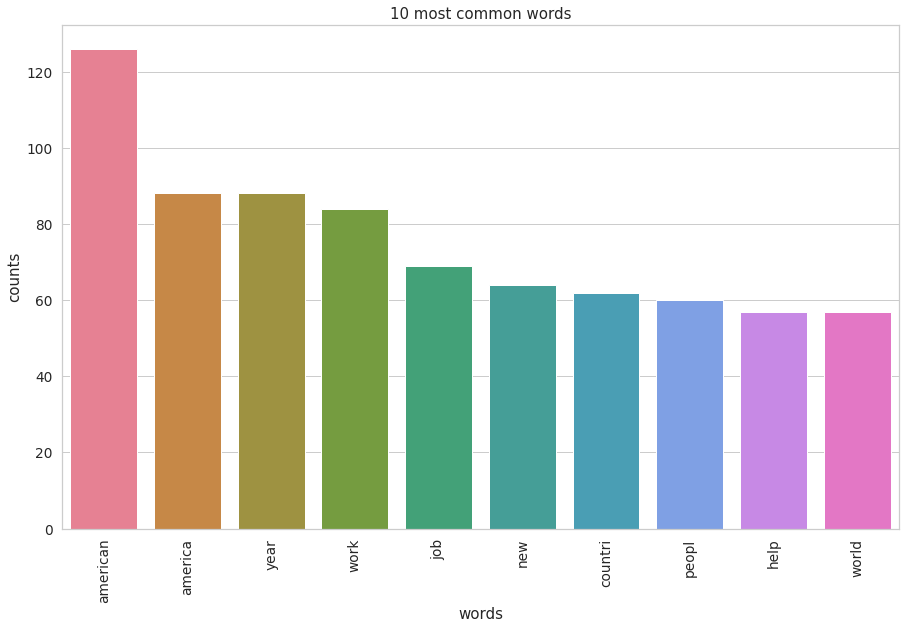

In [159]:
# Load the library with the CountVectorizer method
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
# Helper function
def plot_10_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='10 most common words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()
# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words='english')
# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(stemmed)
# Visualise the 10 most common words
plot_10_most_common_words(count_data, count_vectorizer)

In [160]:
print(count_vectorizer)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words='english',
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)


In [161]:
count_data

<8819x2065 sparse matrix of type '<class 'numpy.int64'>'
	with 7918 stored elements in Compressed Sparse Row format>

In [162]:
import warnings
warnings.simplefilter("ignore", DeprecationWarning)
# Load the LDA model from sk-learn
from sklearn.decomposition import LatentDirichletAllocation as LDA
 
# Helper function
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
        
# Tweak the two parameters below
number_topics = 10
number_words = 10
# Create and fit the LDA model
lda = LDA(n_components=number_topics, n_jobs=-1, random_state= 42)
lda.fit(count_data)
# Print the topics found by the LDA model
print("Topics found via LDA:")
print_topics(lda, count_vectorizer, number_words)

Topics found via LDA:

Topic #0:
work new need secur mani opportun school live energi set

Topic #1:
world way govern power thank pay children start polit access

Topic #2:
help futur let commun support togeth lead say life stand

Topic #3:
job peopl state want right dream wage long join fair

Topic #4:
america nation like tonight chang better great reform care home

Topic #5:
year famili citizen good forc insur leader promis rais vote

Topic #6:
busi economi creat believ law final presid voic thing progress

Topic #7:
american time know unit million protect ask immigr past young

Topic #8:
make congress come war tax cut build love kid place

Topic #9:
countri everi worker today save health colleg alli militari student


In [0]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import pandas as pd

In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
link = 'https://drive.google.com/file/d/13exn9tpHYLnKbRpxZTGmdxP96oTiW7AD/view?usp=sharing'

In [0]:
downloaded = drive.CreateFile({'id':"13exn9tpHYLnKbRpxZTGmdxP96oTiW7AD"}) 
downloaded.GetContentFile('LDALabellingNB.csv')

In [0]:
df_new =pd.read_csv('LDALabellingNB.csv')

In [193]:
df_new

,Label,Word1,Word2,Word3,Word4,Word5,Word6,Word7,Word8,Word9,Word10
0,Job assurance,job,new,make,workers,today,work,united,americans,states,years
1,Congress Power,america,world,future,help,year,protect,congress,power,care,states
2,American People,year,work,just,want,know,make,people,states,america,years
3,Leadership,american,believe,business,country,tax,security,america,leadership,make,new
4,Health,american,people,america,world,right,jobs,years,new,need,health
5,Government Support,time,years,change,long,year,great,govenment,mr,support,ve
6,Democrats,americans,work,people,tonight,new,nation,democrats,congress,childern,health
7,World War II,families,america,let,war,work,world,country,make,ll,going
8,Diplomacy,like,american,ll,america,country,just,help,diplomacy,support,time
9,Security,security,americans,god,time,ve,things,bless,new,country,come


In [0]:
df_new['LDA_Labels']=df_new.Word1 + ' ' + df_new.Word2 +' ' + df_new.Word3 +' ' + df_new.Word4 +' ' + df_new.Word5 +' ' + df_new.Word6 +' ' + df_new.Word7 +' ' + df_new.Word8 +' ' + df_new.Word9 +' ' + df_new.Word10

In [195]:
df_new.columns

Index(['Label', 'Word1', 'Word2', 'Word3', 'Word4', 'Word5', 'Word6', 'Word7',
       'Word8', 'Word9', 'Word10', 'LDA_Labels'],
      dtype='object')

In [0]:
from nltk.tokenize import word_tokenize, sent_tokenize
tokens = [[w.lower() for w in word_tokenize(text)] for text in df_new.LDA_Labels]

In [197]:
tokens

[['job',
  'new',
  'make',
  'workers',
  'today',
  'work',
  'united',
  'americans',
  'states',
  'years'],
 ['america',
  'world',
  'future',
  'help',
  'year',
  'protect',
  'congress',
  'power',
  'care',
  'states'],
 ['year',
  'work',
  'just',
  'want',
  'know',
  'make',
  'people',
  'states',
  'america',
  'years'],
 ['american',
  'believe',
  'business',
  'country',
  'tax',
  'security',
  'america',
  'leadership',
  'make',
  'new'],
 ['american',
  'people',
  'america',
  'world',
  'right',
  'jobs',
  'years',
  'new',
  'need',
  'health'],
 ['time',
  'years',
  'change',
  'long',
  'year',
  'great',
  'govenment',
  'mr',
  'support',
  've'],
 ['americans',
  'work',
  'people',
  'tonight',
  'new',
  'nation',
  'democrats',
  'congress',
  'childern',
  'health'],
 ['families',
  'america',
  'let',
  'war',
  'work',
  'world',
  'country',
  'make',
  'll',
  'going'],
 ['like',
  'american',
  'll',
  'america',
  'country',
  'just',
  'help'

In [0]:
dict = gensim.corpora.Dictionary(tokens)

In [0]:
#To convert tokenized topics to vectors
corpus = [dict.doc2bow(tokens) for tokens in tokens]

In [200]:
tf_idf = gensim.models.TfidfModel(corpus)
for doc in tf_idf[corpus]:
    print([[dict[id], np.around(freq, decimals=2)] for id, freq in doc])

[['americans', 0.23], ['job', 0.44], ['make', 0.18], ['new', 0.13], ['states', 0.23], ['today', 0.44], ['united', 0.44], ['work', 0.18], ['workers', 0.44], ['years', 0.18]]
[['states', 0.22], ['america', 0.09], ['care', 0.41], ['congress', 0.29], ['future', 0.41], ['help', 0.29], ['power', 0.41], ['protect', 0.41], ['world', 0.22], ['year', 0.22]]
[['make', 0.2], ['states', 0.27], ['work', 0.2], ['years', 0.2], ['america', 0.11], ['year', 0.27], ['just', 0.36], ['know', 0.51], ['people', 0.27], ['want', 0.51]]
[['make', 0.17], ['new', 0.13], ['america', 0.1], ['american', 0.23], ['believe', 0.44], ['business', 0.44], ['country', 0.17], ['leadership', 0.44], ['security', 0.31], ['tax', 0.44]]
[['new', 0.14], ['years', 0.19], ['america', 0.1], ['world', 0.24], ['people', 0.24], ['american', 0.24], ['health', 0.33], ['jobs', 0.47], ['need', 0.47], ['right', 0.47]]
[['years', 0.15], ['year', 0.2], ['change', 0.39], ['govenment', 0.39], ['great', 0.39], ['long', 0.39], ['mr', 0.39], ['suppo

In [201]:
sims = gensim.similarities.Similarity('.',tf_idf[corpus],
                                        num_features=len(dict))

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:718: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [0]:
mat = []

file1=['Thank you very much. Mr. Speaker, Mr. Vice President, members of Congress, the first lady of the United States']
file2=['I am here tonight to deliver a message of unity and strength, and it is a message deeply delivered from my heart']
file3=['But then the quiet voices became a loud chorus, as thousands of citizens now spoke out together, from cities small and large, all across our country']
file=[file1,file2,file3]
def IsSimilarText(sentences):
  for sentence in sentences:
    tokens = sent_tokenize(sentence)
    for line in tokens:
        mat.append(line)
  print("\nNumber of documents:",len(mat))  
  for line in mat:
      query_doc = [w.lower() for w in word_tokenize(line)]
      query_doc_bow = dict.doc2bow(query_doc) 
  query_doc_tf_idf = tf_idf[query_doc_bow]
  max_number = float('-inf')
  label=-1
  for i,j in enumerate(sims[query_doc_tf_idf]):
    print('Similarity with ',i,'the Label is',j)
    if j > max_number:
      label = i
      max_number = j
  print("\nLabel for this Topic is:",df_new.Label[label])

In [203]:
print("Printing all labels:\n",df_new.Label)
for i in file:
  print("\n",i,"\n")
  IsSimilarText(i)

Printing all labels:
 0         Job assurance
1        Congress Power
2       American People
3            Leadership
4                Health
5    Government Support
6             Democrats
7          World War II
8             Diplomacy
9              Security
Name: Label, dtype: object

 ['Thank you very much. Mr. Speaker, Mr. Vice President, members of Congress, the first lady of the United States'] 


Number of documents: 2
Similarity with  0 the Label is 0.42427853
Similarity with  1 the Label is 0.23740247
Similarity with  2 the Label is 0.105203815
Similarity with  3 the Label is 0.0
Similarity with  4 the Label is 0.0
Similarity with  5 the Label is 0.0
Similarity with  6 the Label is 0.15318702
Similarity with  7 the Label is 0.0
Similarity with  8 the Label is 0.0
Similarity with  9 the Label is 0.0

Label for this Topic is: Job assurance

 ['I am here tonight to deliver a message of unity and strength, and it is a message deeply delivered from my heart'] 


Number of documen

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:410: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL
/usr/local/lib/python3.6/dist-packages/gensim/similarities/docsim.py:518: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  result = numpy.hstack(shard_results)
